# **STATS FOR MY THESIS**

*"Lies, damned lies, and statistics"*

### DEPENDENCIES & DATA

In [ ]:
# RUN THIS IF YOU USE GOOGLE COLAB TO FETCH THE LIBRARY AND REPO DATA
!pip install scikit_posthocs
!rm -rf ./content/TopSecret \
  && git clone https://github.com/HeathArhturLouis/TopSecret.git

In [23]:
%matplotlib inline

# Import packages
import numpy as np
import pandas as pd
import scipy.stats as damned_lies
import scikit_posthocs as posthocs
from matplotlib import pyplot as plt


In [52]:
#CONSTANTS

# study group id's
detection_id = 1
feedback_id = 2

# study group colors
detection_color = '#F6D55C'
feedback_color  = '#3CAEA3'

In [35]:
# Load data sets from "csv's"
friedman = pd.read_csv("data/Attempts-per-Scenario-Friedman.csv", delim_whitespace=True)
friedman_detection = pd.read_csv("data/friedman-detection-model.csv", delim_whitespace=True)
friedman_feedback = pd.read_csv("data/friedman-feedback-group.csv", delim_whitespace=True)

wilcoxon = pd.read_csv("data/Before-And-After-Correct-Answers-Wilcoxon-Signed-Rank-Test.csv", delim_whitespace=True)
students = pd.read_csv("data/Correct-Answers-Postgame-Independent-Sample-T-Test.csv", delim_whitespace=True)

### FRIEDMAN
*Non parametric test to compare individual question performance*

In [38]:
# FRIEDMAN FOR BOTH GROUPS
# NULL HYPOTHESIS: Median performance of problem scenarios are all the same
damned_lies.friedmanchisquare(*np.transpose(friedman.values)[1:])

FriedmanchisquareResult(statistic=33.05735805330244, pvalue=2.583291815262756e-05)

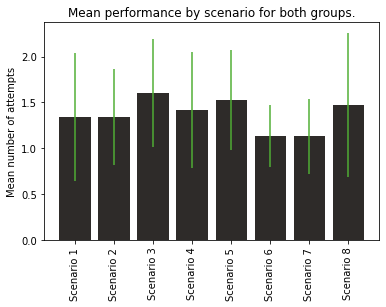

In [69]:
plt.bar(
    range(8),
    [np.mean(a) for a in np.transpose(friedman.values)[1:]],
    yerr=[np.std(a) for a in np.transpose(friedman.values)[1:]],
    tick_label=['Scenario ' + str(i + 1) for i in range(8)],
    color='#2e2b29',
    ecolor='#50AE34')

plt.title("Mean performance by scenario for both groups.")
plt.ylabel('Mean number of attempts')
plt.xticks(rotation=90)
plt.show()

In [ ]:
friedman_detection

In [39]:
# FRIEDMAN FOR DETECTION MODEL
# NULL HYPOTHESIS: Median performance of problem scenarios are all the same
damned_lies.friedmanchisquare(*np.transpose(friedman_detection.values)[2:])

FriedmanchisquareResult(statistic=19.349431818181692, pvalue=0.007160380493263334)

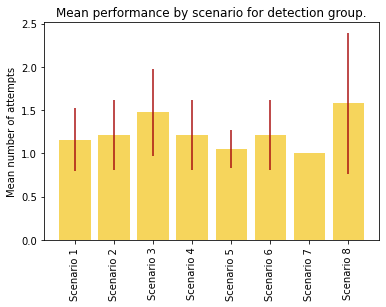

In [62]:
plt.bar(
    range(8),
    [np.mean(a) for a in np.transpose(friedman_detection.values)[2:]],
    yerr=[np.std(a) for a in np.transpose(friedman_detection.values)[2:]],
    tick_label=['Scenario ' + str(i + 1) for i in range(8)],
    color=detection_color,
    ecolor='#AA1111')

plt.title("Mean performance by scenario for detection group.")
plt.ylabel('Mean number of attempts')
plt.xticks(rotation=90)
plt.show()

In [41]:
# FRIEDMAN FOR FEEDBACK GROUP
# NULL HYPOTHESIS: Median performance of problem scenarios are all the same
damned_lies.friedmanchisquare(*np.transpose(friedman_feedback.values)[2:])

FriedmanchisquareResult(statistic=42.684931506849196, pvalue=3.8369691993606476e-07)

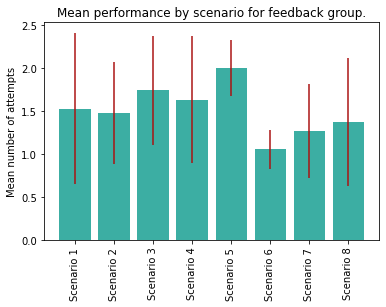

In [60]:
plt.bar(
    range(8),
    [np.mean(a) for a in np.transpose(friedman_feedback.values)[2:]],
    yerr=[np.std(a) for a in np.transpose(friedman_feedback.values)[2:]],
    tick_label=['Scenario ' + str(i + 1) for i in range(8)],
    color=feedback_color,
    ecolor='#AA1111')

plt.title("Mean performance by scenario for feedback group.")
plt.ylabel('Mean number of attempts')
plt.xticks(rotation=90)
plt.show()

**Sucessfully rejected the null hypothesis in both cases, apply**
**pairwise comparisons using Nemenyi post hoc test**

In [43]:
# DETECTION MODEL
posthocs.posthoc_nemenyi_friedman(friedman_detection.drop(['UserId', 'StudyGroupId'], axis=1))

,Scenario1,Scenario2,Scenario3,Scenario4,Scenario5,Scenario6,Scenario7,Scenario8
Scenario1,1.000000,0.9,0.768777,0.9,0.900000,0.9,0.900000,0.900000
Scenario2,0.900000,1.0,0.900000,0.9,0.900000,0.9,0.900000,0.900000
Scenario3,0.768777,0.9,1.000000,0.9,0.470039,0.9,0.301991,0.900000
Scenario4,0.900000,0.9,0.900000,1.0,0.900000,0.9,0.900000,0.900000
Scenario5,0.900000,0.9,0.470039,0.9,1.000000,0.9,0.900000,0.630197
Scenario6,0.900000,0.9,0.900000,0.9,0.900000,1.0,0.900000,0.900000
Scenario7,0.900000,0.9,0.301991,0.9,0.900000,0.9,1.000000,0.470039
Scenario8,0.900000,0.9,0.900000,0.9,0.630197,0.9,0.470039,1.000000


In [44]:
# FEEDBACK GROUP
posthocs.posthoc_nemenyi_friedman(friedman_feedback.drop(['UserId', 'StudyGroupId'], axis=1))

,Scenario1,Scenario2,Scenario3,Scenario4,Scenario5,Scenario6,Scenario7,Scenario8
Scenario1,1.000000,0.900000,0.900000,0.900000,0.118189,0.570804,0.900000,0.900000
Scenario2,0.900000,1.000000,0.900000,0.900000,0.174998,0.470039,0.900000,0.900000
Scenario3,0.900000,0.900000,1.000000,0.900000,0.788576,0.043333,0.404639,0.709385
Scenario4,0.900000,0.900000,0.900000,1.000000,0.590602,0.108545,0.610400,0.900000
Scenario5,0.118189,0.174998,0.788576,0.590602,1.000000,0.001000,0.007416,0.039221
Scenario6,0.570804,0.470039,0.043333,0.108545,0.001000,1.000000,0.900000,0.808373
Scenario7,0.900000,0.900000,0.404639,0.610400,0.007416,0.900000,1.000000,0.900000
Scenario8,0.900000,0.900000,0.709385,0.900000,0.039221,0.808373,0.900000,1.000000


### UNPAIRED T-TEST
*H_0: There is no significant difference in performance between groups 1 and 2*

In [61]:
# Failed to reject H_0 --> We cannot conclude there is no significant difference in means of the two populations
group1 = students[students["StudyGroupId"] == detection_id]["CorrectAnswersCount"]
group2 = students[students["StudyGroupId"] == feedback_id]["CorrectAnswersCount"]

damned_lies.ttest_ind(group1, group2)

Ttest_indResult(statistic=1.3005442373195382, pvalue=0.20167873671208875)

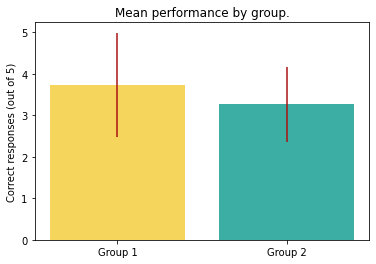

In [51]:
plt.bar(
    [0, 1],
    [np.mean(group1), np.mean(group2)],
    color=[detection_color, feedback_color],
    yerr=[np.std(group1), np.std(group2)],
    tick_label=['Group 1','Group 2'],
    ecolor='#AA1111')

plt.title("Mean performance by group.")
plt.ylabel('Correct responses (out of 5)')
plt.show()

### WILCOXON RANK
*Determine weather game has significantly affected an individuals performance on questions*


*H_0: There is no significant different between populations*

In [47]:
# Sucesfully rejected H_0 ---> There appears to be a significant difference between the two populations

damned_lies.wilcoxon(wilcoxon["Baseline"], wilcoxon["Postgame"])

WilcoxonResult(statistic=87.0, pvalue=0.0002624666422454448)

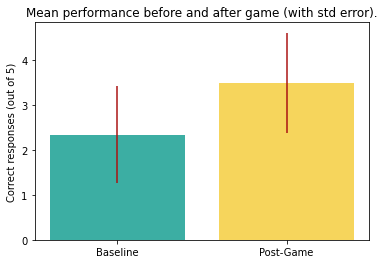

In [48]:
plt.bar(
    [0, 1],
    [np.mean(wilcoxon["Baseline"]), np.mean(wilcoxon["Postgame"])],
    color=['#3CAEA3','#F6D55C'],
    yerr=[np.std(a) for a in [wilcoxon["Baseline"], wilcoxon["Postgame"]]],
    tick_label=['Baseline','Post-Game'],
    ecolor='#AA1111')

plt.title("Mean performance before and after game (with std error).")
plt.ylabel('Correct responses (out of 5)')
plt.show()